In [6]:
import numpy as np
me_GaAs = 0.067 #assumes GaAs at 300K
eVperJ = 6.241509e18 #Joule per Volt, elementary charge
me = 9.1093837e-31 #kg, electron mass
meff = me * me_GaAs #effective mass in GaAs at 300K
hbar = 1.0545718e-34 #Joule second, reduced Planck's constant

# hbar_eVs = 6.582e-16
n_invcm = 10**13 #2D density/cm^2
n = n_invcm*10000 #in m^-2
mu_J = n*np.pi*hbar**2/meff
mu = mu_J*eVperJ
print("mu =" + str(mu) + "eV")


mu =0.3572958592545923eV


In [7]:
#higher mu
deltaE1E2_eV = 0.159 #meV, energy difference between first and second subband
deltaE1E2_J = deltaE1E2_eV/eVperJ
muhigher = n*np.pi*hbar**2/(2*meff)-(deltaE1E2_J/2)
muhigher_eV = muhigher*eVperJ
print("muhigher =" + str(muhigher_eV) + "eV")

muhigher =0.09914792962729614eV


In [8]:
n_invcm

10000000000000

In [9]:
well_l = 7e-7 #well width in cm
n3d = n_invcm/well_l
print("3D density =" + str(n3d) + "cm^-3")

3D density =1.4285714285714287e+19cm^-3


<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4g/svln6v_d2710ndrj3tsk7x4c0000gn/T/ipykernel_51316/4201431899.py:37: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Density of States $g(E)$ and Fermi Function $f(E - \mu)$", fontsize=16)


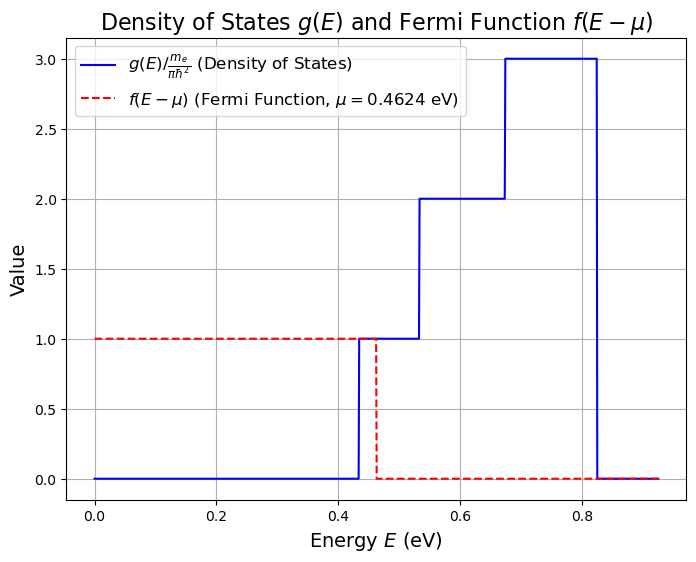

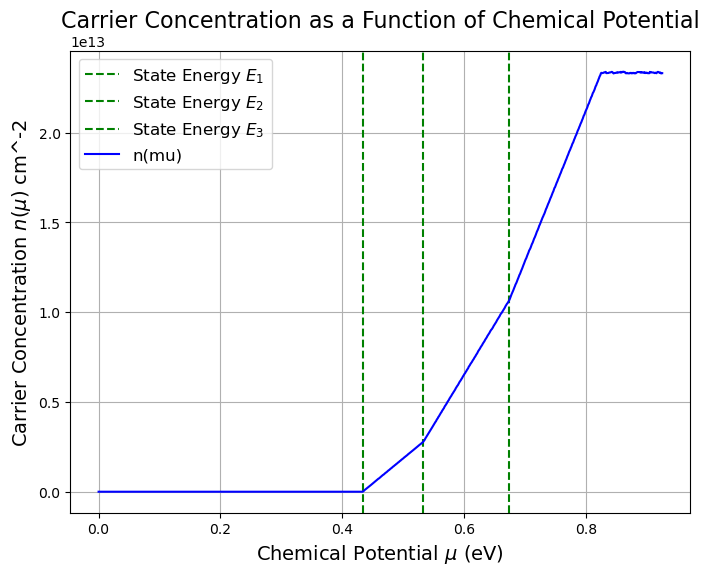

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the energy levels relative to the CBM
CBM = 4.020731028571427612e-1  # Conduction Band Minimum
AlGaAs_CBM = 8.248e-1
energy_levels = [4.333901469808462137e-1, 5.330882227046231936e-1,6.737103286465871976e-1]  # E1, E2, E3 relative to CBM
# energy_levels = 
dos_values = [1, 2, 3]  # Corresponding density of states for each level
gdims = meff/(np.pi*hbar**2)

# Define the density of states function g(E) based on the energy levels
def g(E): #without numerical factor
    if E> AlGaAs_CBM:
        return 0
    for i, E_level in enumerate(energy_levels):
        if E_level <= E < (energy_levels[i + 1] if i + 1 < len(energy_levels) else AlGaAs_CBM):
            return dos_values[i]
    return 0  # No states outside the defined levels

# Define the Fermi-Dirac distribution at T=0K
def f(E, mu):
    # Step function approximation for T=0K
    return 1 if E <= mu else 0

# Plot g(E) and f(E - mu) for a specific mu
E_values = np.linspace(0, AlGaAs_CBM+0.1, 1000)  # Energy range
mu_example = np.mean(E_values)  # Example chemical potential
g_values = np.array([g(E) for E in E_values])  # Evaluate g(E)
f_values = np.array([f(E, mu_example) for E in E_values])  # Evaluate f(E - mu)

plt.figure(figsize=(8, 6))
plt.plot(E_values, g_values, label=r"$g(E)/\frac{m_e}{\pi \hbar^2}$ (Density of States)", color="blue")
plt.plot(E_values, f_values, label=fr"$f(E - \mu)$ (Fermi Function, $\mu={mu_example}$ eV)", color="red", linestyle="--")
plt.xlabel(r"Energy $E$ (eV)", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.title("Density of States $g(E)$ and Fermi Function $f(E - \mu)$", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Define the range of chemical potentials (mu)
# mu_values = np.linspace(CBM, AlGaAs_CBM, 1000)  # From 0 to 1.5 eV
mu_values = E_values

# Calculate n(mu) by integrating g(E) from 0 to mu
ns_invm2 = np.array([])  # Initialize an empty array to store carrier concentrations
for mu in mu_values:
    # Perform numerical integration of g(E) from 0 to mu
    E_values = np.linspace(0, mu, 1000)  # Energy range for integration
    g_values_dimensionless = np.array([g(E) for E in E_values])  # Evaluate g(E)
    n_gimdimensionless_eV = np.trapezoid(g_values_dimensionless, E_values)  # Numerical integration using trapezoidal rule #already includes dimension
    n_invm2 = n_gimdimensionless_eV * gdims /eVperJ  # carrier concentration in m^-2

    ns_invm2 = np.append(ns_invm2,n_invm2)

# ns_invm
# Plot n(mu)

plt.figure(figsize=(8, 6))

for energy_ind in range(0,len(energy_levels)):
    plt.axvline(x=energy_levels[energy_ind], color="green", linestyle="--", label=fr"State Energy $E_{energy_ind+1:d}$ ")

plt.plot(mu_values, ns_invm2/10**4, label=r"n(mu)", color='blue')
plt.xlabel(r"Chemical Potential $\mu$ (eV)", fontsize=14)
plt.ylabel(r"Carrier Concentration $n(\mu)$ cm^-2", fontsize=14)
plt.title("Carrier Concentration as a Function of Chemical Potential", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
1/eVperJ